# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Task 1: Import Libraries

In [ ]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.7.0


# Task 2: Rotation

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40
)

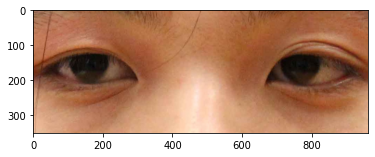

In [ ]:
image_path = '/content/drive/MyDrive/3DV-eye/train/0V_eyes/0013_2m_0P_0V_-10H.jpg'

plt.imshow(plt.imread(image_path));

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 866 images belonging to 3 classes.


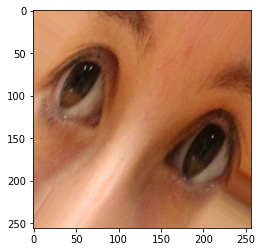

In [ ]:
x, y = next(generator.flow_from_directory('/content/drive/MyDrive/3DV-eye', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = [-80, -20, 0, 20, 80],
    height_shift_range = [-20, 0, 20]
)

Found 866 images belonging to 3 classes.


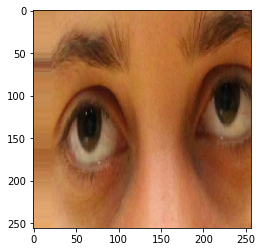

In [ ]:
x, y = next(generator.flow_from_directory('/content/drive/MyDrive/3DV-eye', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 866 images belonging to 3 classes.


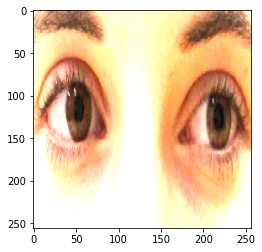

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range = (0.5, 2)
)

x, y = next(generator.flow_from_directory('/content/drive/MyDrive/3DV-eye', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 866 images belonging to 3 classes.


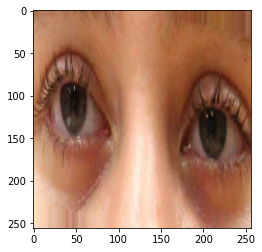

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    shear_range=40
)

x, y = next(generator.flow_from_directory('/content/drive/MyDrive/3DV-eye', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 866 images belonging to 3 classes.


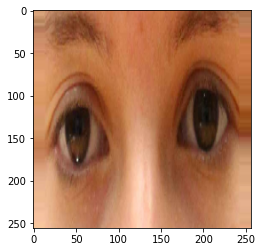

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range = 0.4
)

x, y = next(generator.flow_from_directory('/content/drive/MyDrive/3DV-eye', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 866 images belonging to 3 classes.


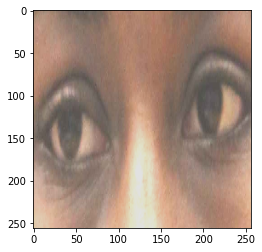

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range = 100
)

x, y = next(generator.flow_from_directory('/content/drive/MyDrive/3DV-eye', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 8: Flips

Found 866 images belonging to 3 classes.


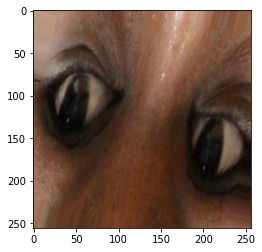

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 30
)

x, y = next(generator.flow_from_directory('/content/drive/MyDrive/3DV-eye', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True
)

generator.fit(x_train)

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

0.31712383 0.8848136 [[2]]
120.70756512369792


### Samplewise

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

8.940697e-08 0.9999999 [[0]]


# Task 10: Rescale and Preprocessing Function

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [ ]:
print(x.mean(), x.std(), y)

0.08277167 0.4958737 [[8]]


# Task 11: Using in Model Training

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
    horizontal_flip = True,
    rotation_range = 20
)

SyntaxError: ignored

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top = False, input_shape=(32, 32, 3),
        pooling='avg'
    ),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
_ = model.fit(
generator.flow(x_train, y_train, batch_size = 32),
epochs = 1, steps_per_epoch = 10)

  ...
    to  
  ['...']
Train for 10 steps
10/10 [==============================] - 12s 1s/step - loss: 3.0122 - accuracy: 0.1625
